# Explore here

In [21]:
# Your code here
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.to_csv("../data/raw/data_raw.csv", index=False)
data.info()
data_uniques = data.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipykernel_1961/307398690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uniques["sex"] = pd.factorize(data_uniques["sex"])[0]
/tmp/ipykernel_1961/307398690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uniques["smoker"] = pd.factorize(data_uniques["smoker"])[0]
/tmp/ipykernel_1961/307398690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<Axes: >

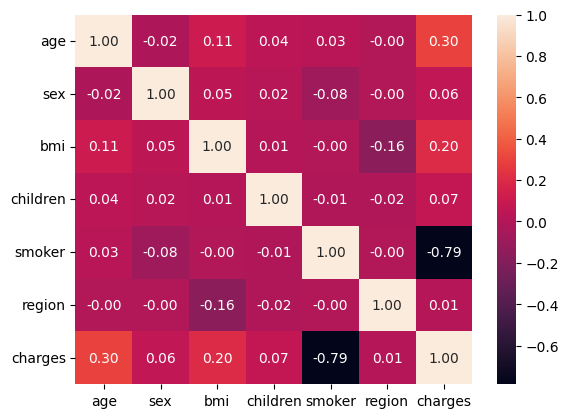

In [26]:
import seaborn as sns
data_uniques["sex"] = pd.factorize(data_uniques["sex"])[0]
data_uniques["smoker"] = pd.factorize(data_uniques["smoker"])[0]
data_uniques["region"] = pd.factorize(data_uniques["region"])[0]
sns.heatmap(data_uniques.corr(), annot = True, fmt = ".2f")


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

col = ["age", "bmi", "smoker", "charges"]
new_data = data_uniques[col]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(new_data[col])
df_scal = pd.DataFrame(scal_features, index = new_data.index, columns = col)
df_scal["charges"] = new_data["charges"]

X = df_scal.drop("charges", axis=1)
Y = df_scal["charges"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = r2_score(y_test, y_pred)
print(score)

0.7073512395834067


In [39]:
x_train.to_csv("../data/processed/x_train.csv", index=False)
x_test.to_csv("../data/processed/x_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)